In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier




In [484]:
df = pd.read_csv('weatherAUS.csv')

In [485]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## DATA CLEANING

In [487]:
df['Date'] = pd.to_datetime(df['Date'])

In [488]:
df['year'] = df['Date'].dt.year # dt is a pandass accessor to extract year ,month, time etcc.

In [489]:
df['month'] = df['Date'].dt.month

In [490]:
df['day'] = df['Date'].dt.day

In [491]:
df['Date'].head()

0   2008-12-01
1   2008-12-02
2   2008-12-03
3   2008-12-04
4   2008-12-05
Name: Date, dtype: datetime64[ns]

In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [493]:
df['WindGustDir'].value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

In [494]:
def winddir(x):
    if x== 'W': return 1
    if x == 'SE': return 2
    if x == 'N': return 3
    if x == 'SSE': return 4
    if x == 'E': return 5
    if x == 'S': return 6
    if x== 'WSW': return 7
    if x == 'SW': return 8
    if x == 'SSW': return 9
    if x == 'WNW': return 10
    if x == 'NW': return 11
    if x == 'ENE': return 12
    if x== 'ESE': return 13
    if x == 'NE': return 14
    if x == 'NNW': return 15
    if x == 'NNE': return 16

In [495]:
df['WindGustDir'] = df['WindGustDir'].apply(winddir)

In [496]:
df['WindDir9am'] = df['WindDir9am'].apply(winddir)
df['WindDir3pm'] = df['WindDir3pm'].apply(winddir)

In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  float64       
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  float64       
 10  WindDir3pm     141232 non-null  float64       
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  float64       
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  float64       
 10  WindDir3pm     141232 non-null  float64       
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [499]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,1.0,44.0,1.0,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,10.0,44.0,15.0,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,7.0,46.0,1.0,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,14.0,24.0,2.0,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,1.0,41.0,12.0,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [500]:
print(df['RainToday'].value_counts())
print('*'*100)
print(df['RainTomorrow'].value_counts())

No     110319
Yes     31880
Name: RainToday, dtype: int64
****************************************************************************************************
No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


In [501]:
def rain(x):
    if x == 'No': return 0
    if x == 'Yes': return 1

In [502]:
df['RainToday'] = df['RainToday'].apply(rain)
df['RainTomorrow'] = df['RainTomorrow'].apply(rain)

In [503]:
df.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,1.0,44.0,1.0,...,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,10.0,44.0,15.0,...,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,7.0,46.0,1.0,...,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,14.0,24.0,2.0,...,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,1.0,41.0,12.0,...,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,2008,12,5
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,10.0,56.0,1.0,...,1005.4,NaN,NaN,20.6,28.9,0.0,0.0,2008,12,6
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,1.0,50.0,8.0,...,1008.2,1.0,NaN,18.1,24.6,0.0,0.0,2008,12,7
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,1.0,35.0,4.0,...,1010.1,NaN,NaN,16.3,25.5,0.0,0.0,2008,12,8
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,15.0,80.0,2.0,...,1003.6,NaN,NaN,18.3,30.2,0.0,1.0,2008,12,9
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,1.0,28.0,6.0,...,1005.7,NaN,NaN,20.1,28.2,1.0,0.0,2008,12,10


In [504]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
year                 0
month                0
day                  0
dtype: int64

In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  float64       
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  float64       
 10  WindDir3pm     141232 non-null  float64       
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [506]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134.000000,135197.000000,134894.000000,141232.000000,143693.000000,...,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199.000000,142193.000000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,7.971243,40.035230,8.170734,8.073956,14.043426,...,1015.255889,4.447461,4.509930,16.990631,21.68339,0.224193,0.224181,2012.769751,6.399615,15.712258
std,6.398495,7.119049,8.478060,4.193704,3.785483,4.521348,13.607062,4.659313,4.568165,8.915375,...,7.037414,2.887159,2.720357,6.488753,6.93665,0.417051,0.417043,2.537684,3.427262,8.794789
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,1.000000,6.000000,1.000000,1.000000,0.000000,...,977.100000,0.000000,0.000000,-7.200000,-5.40000,0.000000,0.000000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,4.000000,31.000000,4.000000,4.000000,7.000000,...,1010.400000,1.000000,2.000000,12.300000,16.60000,0.000000,0.000000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,8.000000,39.000000,8.000000,8.000000,13.000000,...,1015.200000,5.000000,5.000000,16.700000,21.10000,0.000000,0.000000,2013.000000,6.000000,16.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,12.000000,48.000000,12.000000,12.000000,19.000000,...,1020.000000,7.000000,7.000000,21.600000,26.40000,0.000000,0.000000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,16.000000,135.000000,16.000000,16.000000,130.000000,...,1039.600000,9.000000,9.000000,40.200000,46.70000,1.000000,1.000000,2017.000000,12.000000,31.000000


In [507]:
# mean = df['MinTemp'].mean()
# df['MinTemp'] = df['MinTemp'].fillna(mean)

In [508]:
df['MinTemp'].isna().sum()

1485

In [509]:
df['MinTemp'].dtype

dtype('float64')

Here converting the output into integer because both are discrete values.

In [510]:
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0]).astype(int)
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0]).astype(int)

In [511]:
null_value = df[i].isna().sum()

print('Columns were mean values are filled:')
for i in df.columns:

    if (df[i].dtype == 'float64') & (df[i].isna().sum() != 0):
        print(i)
        df[i].fillna(df[i].mean(),inplace=True)

        
        

Columns were mean values are filled:
MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustDir
WindGustSpeed
WindDir9am
WindDir3pm
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm


In [512]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

In [513]:
#Dropping Date column

df.drop('Date',axis=1,inplace=True)


In [514]:
#Checking  
df.RainTomorrow.value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

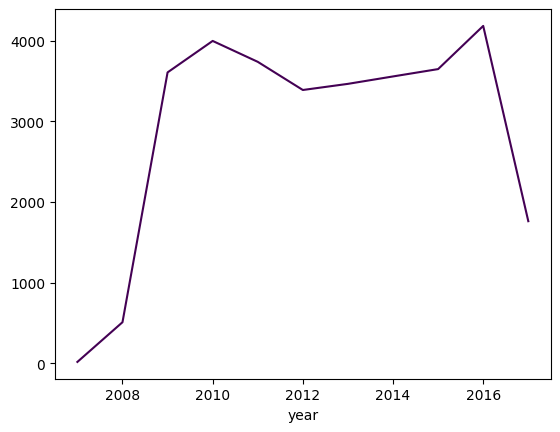

In [515]:
rain_year = df.groupby('year') ['RainTomorrow'].sum()
rain_year.plot(kind='line',colormap='viridis')
plt.show()

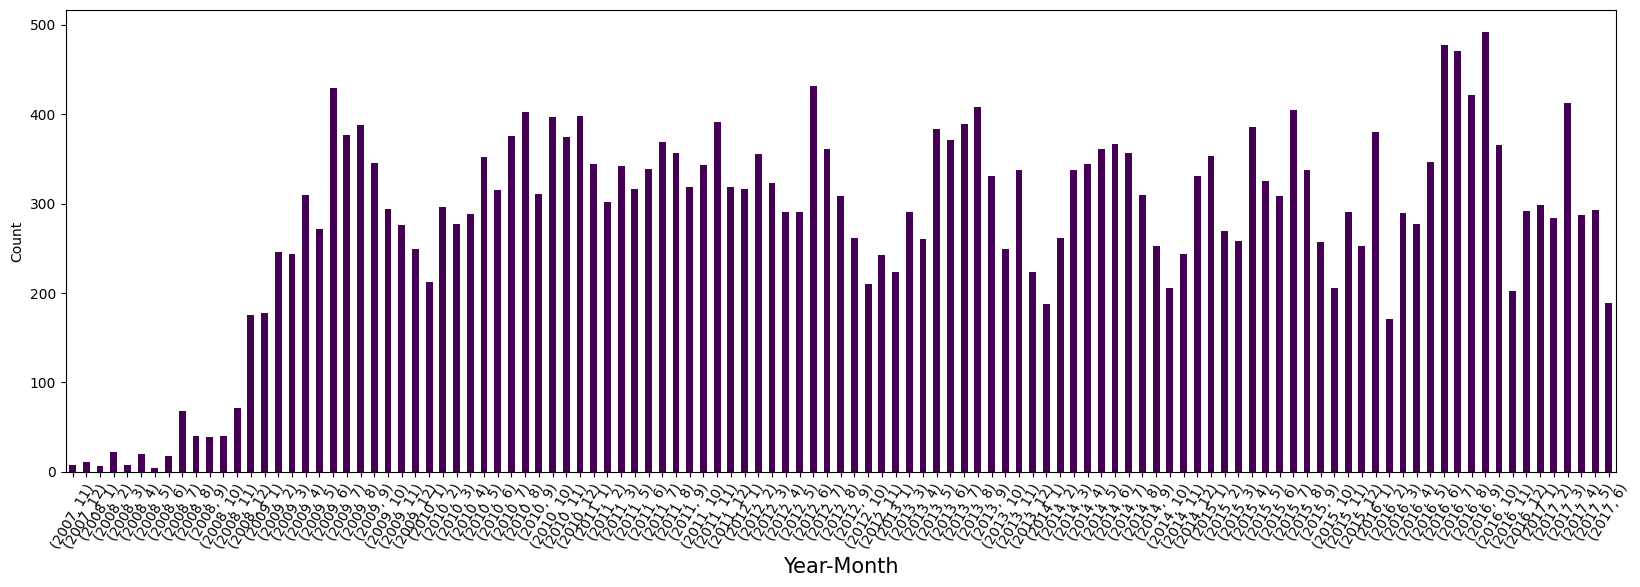

In [516]:
rain_year_month = df.groupby(['year','month'])['RainTomorrow'].sum()

plt.figure(figsize=(20,6))

rain_year_month.plot(kind='bar',cmap='viridis')
plt.xlabel('Year-Month',size=15)
plt.xticks(rotation=60)
plt.ylabel('Count')
plt.show()

Rainfall measures the actual amount of precipitation(like snow,rain,sleet etc) that occurred during a specific time period,

 whereas RainTomorrow is a prediction of whether it will rain or not tomorrow based on the weather data available today.

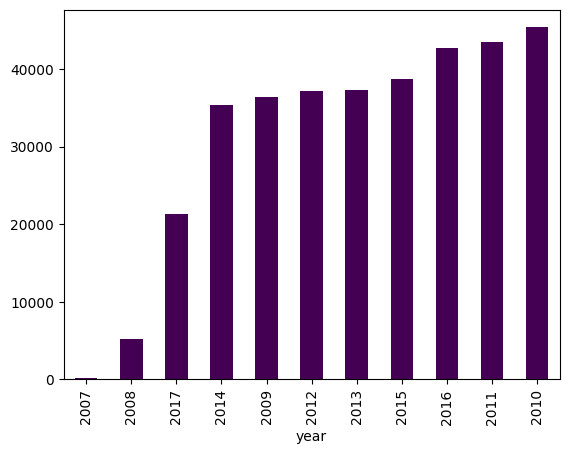

In [517]:
Year_rainfall = df.groupby('year') ['Rainfall'].sum().sort_values(ascending=True)
Year_rainfall.plot(kind='bar',colormap='viridis')
plt.show()

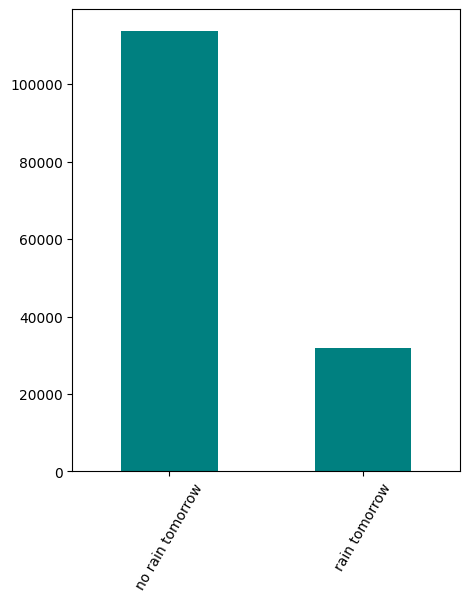

In [518]:
fig, ax = plt.subplots()
roww = ['no rain tomorrow','rain tomorrow']
df['RainTomorrow'].value_counts().plot(kind='bar',color='Teal',figsize=(5,6))
ax.set_xticklabels(roww)
plt.xticks(rotation = 60)
plt.show()

In [519]:
rain_tomorrow = df[df['RainTomorrow']==1]
no_rain_tomorrow = df[df['RainTomorrow']==0]

Rain_ratio = round(len(rain_tomorrow)/float(len(no_rain_tomorrow))*100, 2)
print(f'Ratio and Percentage of Raining and not raining is {len(rain_tomorrow)/float(len(no_rain_tomorrow))} & {Rain_ratio}%')
print(f'Rain Tomorrow : {len(rain_tomorrow)}')
print(f'No rain tomorrow : {len(no_rain_tomorrow)}')

Ratio and Percentage of Raining and not raining is 0.28064939295493163 & 28.06%
Rain Tomorrow : 31877
No rain tomorrow : 113583


In [ ]:
rain_tomorrow.

It is found that dataset is slightly imbalanced 
first we will try modelling without oversampling

In [530]:
# q1 = np.percentile(df['Rainfall'],25)
# q2 = np.percentile(df['Rainfall'],25)
# iqr = q2 -q1

# outliers = df[(df['Rainfall'] < q1 - 1.5 * iqr) | (df['Rainfall'] > q2 + 1.5 * iqr)]['Rainfall']
# outliers

0          0.6
4          1.0
5          0.2
9          1.4
11         2.2
          ... 
145391     6.8
145392    12.6
145393    34.6
145394     3.8
145429     0.4
Name: Rainfall, Length: 54380, dtype: float64

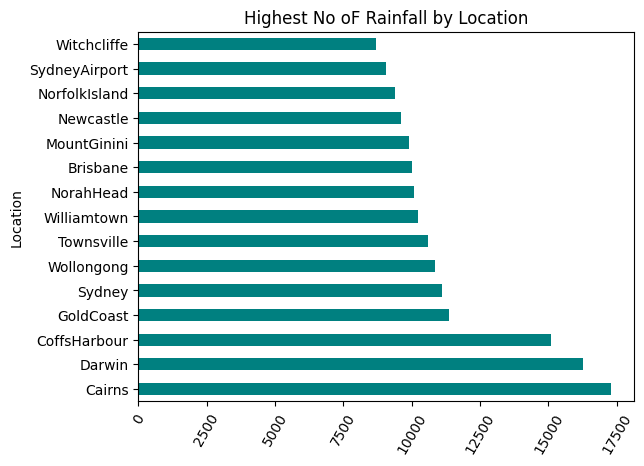

In [528]:
df['Location'].value_counts().size
df8 = df.groupby('Location') ['Rainfall'].sum().sort_values(ascending=False).head(15)
df8.plot.barh(x='Location', y='Rainfall',color='Teal')
plt.xticks(rotation=60)
plt.title('Highest No oF Rainfall by Location')
plt.show()

In [533]:
from sklearn.preprocessing import LabelEncoder
#Encode the labels
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])

In [534]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2,13.4,22.9,0.6,5.468232,7.611178,1.0,44.0,1.0,10.0,...,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,0.0,5.468232,7.611178,10.0,44.0,15.0,7.0,...,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,0.0,5.468232,7.611178,7.0,46.0,1.0,7.0,...,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,0.0,5.468232,7.611178,14.0,24.0,2.0,5.0,...,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,1.0,5.468232,7.611178,1.0,41.0,12.0,11.0,...,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5


In [538]:
#Splitting x and y values
x = df.drop('RainTomorrow',axis=1).values


2

In [539]:
y = df.iloc[:,-4].values
y

array([0, 0, 0, ..., 0, 0, 0])

Train Test Spliting

In [542]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Building Models

In [545]:
kn_model = KNeighborsClassifier(n_neighbors=9)
kn_model.fit(x_train,y_train)
y_pred = kn_model.predict(x_test)


In [547]:
knn_accuracy = accuracy_score(y_test,y_pred)
knn_accuracy

0.8425684036848619

In [548]:
svc_model = SVC()
svc_model.fit(x_train,y_train)
y_pred = svc_model.predict(x_test)

In [ ]:
svm_accuracy = accuracy_score(y_test,y_pred)

In [ ]:
RF_model = RandomForestClassifier()
RF_model.fit(x_train,y_train)
y_pred = RF_model.predict(x_test)


In [ ]:
Gaussian_model = MultinomialNB()
Gaussian_model.fit(x_train,y_train)
y_pred = Gaussian_model.predict(x_test)

In [ ]:
gaussian_acc = accuracy_score(y_test,y_pred)
gaussian_acc